In [1]:
import os
os.chdir("../..")

In [2]:
import torch
from utils.dataset_loader import *
from utils.model_utils import *
from utils.train_utils import *
from utils.metrics import *
from utils.visualization import *

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

[INFO] Using device: cuda


In [4]:
data_dir = "wildfire_dataset_scaled"
batch_size = 16
learning_rate = 0.0005
num_classes = 2

In [5]:
print("[INFO] Loading datasets...")
train_loader, val_loader, test_loader = load_datasets(data_dir, batch_size, augmentation="baseline")
print("[INFO] Datasets loaded successfully!")



2024-12-23 20:28:14,840 - INFO - Loading datasets from wildfire_dataset_scaled with augmentation type 'baseline'.
2024-12-23 20:28:14,841 - INFO - Applying baseline augmentations: Resize and Normalize.
2024-12-23 20:28:14,855 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/train
2024-12-23 20:28:14,859 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/val
2024-12-23 20:28:14,864 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/test
2024-12-23 20:28:14,865 - INFO - Datasets initialized. Preparing DataLoaders...
2024-12-23 20:28:14,866 - INFO - Using WeightedRandomSampler for class balancing.
2024-12-23 20:28:14,867 - INFO - Computing class weights from directory: wildfire_dataset_scaled/train
2024-12-23 20:28:14,869 - INFO - Class 'fire' has 730 samples.
2024-12-23 20:28:14,872 - INFO - Class 'nofire' has 1157 samples.
2024-12-23 20:28:14,874 - INFO - Computed class weights: {'fire': 1.0, 'nofire': 0.

[INFO] Loading datasets...


2024-12-23 20:28:17,048 - INFO - DataLoaders created successfully.


[INFO] Datasets loaded successfully!


In [6]:
print("\n[INFO] Starting Baseline Training for Model: resnet18\n")
print("[INFO] Initializing ResNet18 model...")
model = initialize_model(
    model_name="resnet18",
    num_classes=num_classes,
    pretrained=True,
    freeze_all=True  # Baseline: Freeze all layers
)
print("[INFO] Model initialized successfully!")


[INFO] Starting Baseline Training for Model: resnet18

[INFO] Initializing ResNet18 model...
[INFO] Model initialized successfully!


In [7]:
print("[INFO] Setting up loss function and optimizer...")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
print("[INFO] Loss function and optimizer set up!")

[INFO] Setting up loss function and optimizer...
[INFO] Loss function and optimizer set up!


In [8]:
print("[INFO] Starting model training...")
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=None,  # No learning rate scheduler for baseline
    device=device,
    save_path=f"outputs/models/baseline/resnet18.pt",
    early_stop_patience=10,
    monitor_metric="val_f1",
)
print("[INFO] Training completed successfully!")

[INFO] Starting model training...

Starting training...



[INFO] Best model saved with val_f1: 0.8278
Epoch [1]: Train Loss: 0.6599, Train Acc: 0.6153 | Val Loss: 0.4862, Val Acc: 0.7662, Val Recall: 0.9187, Val F1: 0.8278


[INFO] Best model saved with val_f1: 0.8432
Epoch [2]: Train Loss: 0.5401, Train Acc: 0.7181 | Val Loss: 0.4438, Val Acc: 0.8085, Val Recall: 0.8415, Val F1: 0.8432


[INFO] No improvement in val_f1. Patience: 1/10
Epoch [3]: Train Loss: 0.4876, Train Acc: 0.7647 | Val Loss: 0.4264, Val Acc: 0.7985, Val Recall: 0.8455, Val F1: 0.8370


[INFO] Best model saved with val_f1: 0.8620
Epoch [4]: Train Loss: 0.4851, Train Acc: 0.7695 | Val Loss: 0.4128, Val Acc: 0.8184, Val Recall: 0.9268, Val F1: 0.8620


[INFO] Best model saved with val_f1: 0.8644
Epoch [5]: Train Loss: 0.4502, Train Acc: 0.7901 | Val Loss: 0.4068, Val Acc: 0.8284, Val Recall: 0.8943, Val F1: 0.8644


[INFO] No improvement in val_f1. Patience: 1/10
Epoch [6]: Train Loss: 0.4679, Train Acc: 0.7785 | Val Loss: 0.4213, Val Acc: 0.8010, Val Recall: 0.8211, Val F1: 0.8347


[INFO] No improvement in val_f1. Patience: 2/10
Epoch [7]: Train Loss: 0.4465, Train Acc: 0.7976 | Val Loss: 0.3983, Val Acc: 0.8134, Val Recall: 0.8862, Val F1: 0.8532


[INFO] No improvement in val_f1. Patience: 3/10
Epoch [8]: Train Loss: 0.4362, Train Acc: 0.7939 | Val Loss: 0.4043, Val Acc: 0.8010, Val Recall: 0.8130, Val F1: 0.8333


[INFO] Best model saved with val_f1: 0.8755
Epoch [9]: Train Loss: 0.4352, Train Acc: 0.8023 | Val Loss: 0.3909, Val Acc: 0.8408, Val Recall: 0.9146, Val F1: 0.8755


[INFO] No improvement in val_f1. Patience: 1/10
Epoch [10]: Train Loss: 0.4593, Train Acc: 0.7748 | Val Loss: 0.3917, Val Acc: 0.8358, Val Recall: 0.9228, Val F1: 0.8731


[INFO] No improvement in val_f1. Patience: 2/10
Epoch [11]: Train Loss: 0.4341, Train Acc: 0.7970 | Val Loss: 0.3918, Val Acc: 0.8358, Val Recall: 0.9187, Val F1: 0.8726


[INFO] No improvement in val_f1. Patience: 3/10
Epoch [12]: Train Loss: 0.4532, Train Acc: 0.7965 | Val Loss: 0.3869, Val Acc: 0.8433, Val Recall: 0.8821, Val F1: 0.8732


[INFO] No improvement in val_f1. Patience: 4/10
Epoch [13]: Train Loss: 0.4249, Train Acc: 0.8050 | Val Loss: 0.3999, Val Acc: 0.8259, Val Recall: 0.8293, Val F1: 0.8536


[INFO] No improvement in val_f1. Patience: 5/10
Epoch [14]: Train Loss: 0.4423, Train Acc: 0.7923 | Val Loss: 0.4064, Val Acc: 0.8308, Val Recall: 0.8252, Val F1: 0.8565


[INFO] No improvement in val_f1. Patience: 6/10
Epoch [15]: Train Loss: 0.4277, Train Acc: 0.8071 | Val Loss: 0.4351, Val Acc: 0.7935, Val Recall: 0.7439, Val F1: 0.8151


[INFO] No improvement in val_f1. Patience: 7/10
Epoch [16]: Train Loss: 0.4407, Train Acc: 0.7901 | Val Loss: 0.4029, Val Acc: 0.8308, Val Recall: 0.8537, Val F1: 0.8607


[INFO] No improvement in val_f1. Patience: 8/10
Epoch [17]: Train Loss: 0.4653, Train Acc: 0.7848 | Val Loss: 0.4037, Val Acc: 0.8159, Val Recall: 0.8211, Val F1: 0.8452


[INFO] No improvement in val_f1. Patience: 9/10
Epoch [18]: Train Loss: 0.4327, Train Acc: 0.7954 | Val Loss: 0.3968, Val Acc: 0.8159, Val Recall: 0.9187, Val F1: 0.8593


[INFO] No improvement in val_f1. Patience: 10/10
Epoch [19]: Train Loss: 0.4336, Train Acc: 0.8018 | Val Loss: 0.3886, Val Acc: 0.8308, Val Recall: 0.9228, Val F1: 0.8697
[INFO] Final metrics saved to outputs/models/baseline\final_metrics.json
[INFO] Training stopped after 19 epochs. Best val_f1: 0.8755

[INFO] Training completed successfully!


In [9]:
print("[INFO] Evaluating the model...")
metrics = evaluate_model(
    model=model,
    test_loader=test_loader,
    classes=["No Fire", "Fire"],
    device=device,
    model_name="resnet18",
    save_base_path="outputs/plots/baseline/resnet18",
)
print(f"\n[INFO] Metrics for ResNet18:\n{metrics}")

[INFO] Evaluating the model...
[INFO] Evaluation metrics saved to outputs/plots/baseline/resnet18\resnet18\resnet18_evaluation.json

[INFO] Metrics for ResNet18:
{'classification_report': {'No Fire': {'precision': 0.8533333333333334, 'recall': 0.8050314465408805, 'f1-score': 0.8284789644012945, 'support': 159.0}, 'Fire': {'precision': 0.8807692307692307, 'recall': 0.9123505976095617, 'f1-score': 0.8962818003913894, 'support': 251.0}, 'accuracy': 0.8707317073170732, 'macro avg': {'precision': 0.8670512820512821, 'recall': 0.8586910220752211, 'f1-score': 0.862380382396342, 'support': 410.0}, 'weighted avg': {'precision': 0.8701294559099437, 'recall': 0.8707317073170732, 'f1-score': 0.8699875298488892, 'support': 410.0}}, 'confusion_matrix': [[128, 31], [22, 229]], 'roc_auc': 0.9522162920644466, 'y_true': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[INFO] Training plot saved to outputs/plots/baseline/resnet18_baseline_training_curve.png
[INFO] Confusion matrix saved to outputs/plots/baseline/resnet18_baseline_confusion_matrix.png
[INFO] All results saved successfully!


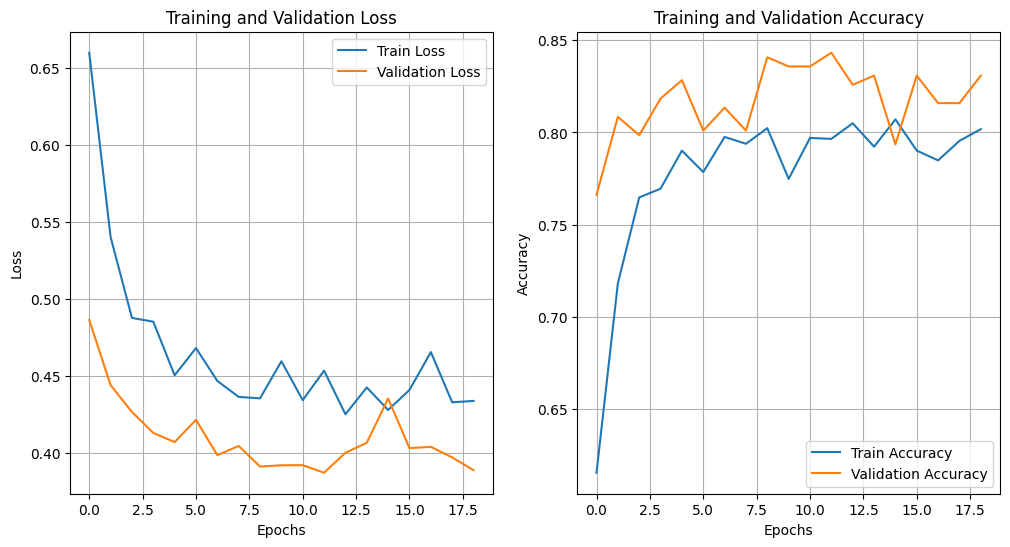

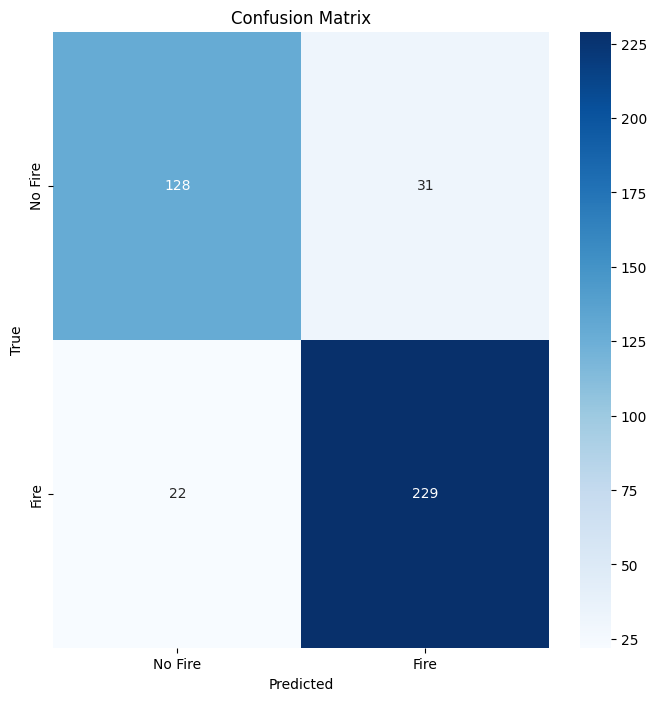

In [10]:
# Training and Validation Curves
plot_training(history, f"outputs/plots/baseline/resnet18_baseline_training_curve.png")

# Confusion Matrix
plot_confusion_matrix(
    cm=metrics["confusion_matrix"],
    classes=["No Fire", "Fire"],
    output_path=f"outputs/plots/baseline/resnet18_baseline_confusion_matrix.png"
)

# Precision-Recall Curve
if "y_probs" in metrics:
    y_true = metrics["y_true"]
    y_probs = [prob[1] for prob in metrics["y_probs"]]
    plot_precision_recall(
        y_true=y_true,
        y_scores=y_probs,
        output_path=f"outputs/plots/baseline/resnet18_baseline_precision_recall_curve.png"
    )

    # ROC Curve
    plot_roc_curve(
        y_true=y_true,
        y_scores=y_probs,
        output_path=f"outputs/plots/baseline/resnet18_baseline_roc_curve.png"
    )

print("[INFO] All results saved successfully!")